In [1]:
# 
from pathlib import Path
import joblib

# Libraries for Data Manipulation
import pandas as pd
import numpy as np

import gc

# Libraries for Data Visualization
import matplotlib.pyplot as plt
import altair as alt
from scipy.stats import skew
import seaborn as sns
sns.set_theme(style="white", rc={"axes.facecolor": "#FFFAF0", "figure.facecolor": "#FFFAF0"})
sns.set_context("poster", font_scale=0.7)

import matplotlib.ticker as ticker

# Libraries to Handle Warnings
import warnings
warnings.filterwarnings('ignore')

# Setting Display Options
pd.set_option("display.max.columns", None)

# Machine Learning Algorithms
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import mutual_info_regression
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder, OneHotEncoder


In [2]:
BASE_DIR = Path("E:/ZeusOps/data/UNSW-NB15/raw")

LIST_EVENTS = pd.read_csv(BASE_DIR / "UNSW_NB15_LIST_EVENTS.csv")
NB15_1 = pd.read_csv(BASE_DIR / "UNSW_NB15_1.csv", low_memory=False)
NB15_2 = pd.read_csv(BASE_DIR / "UNSW_NB15_2.csv", low_memory=False)
NB15_3 = pd.read_csv(BASE_DIR / "UNSW_NB15_3.csv", low_memory=False)
NB15_4 = pd.read_csv(BASE_DIR / "UNSW_NB15_4.csv", low_memory=False)
NB15_features = pd.read_csv(BASE_DIR / "UNSW_NB15_features.csv", encoding="cp1252")

In [3]:
LIST_EVENTS.head()

,Attack category,Attack subcategory,Number of events
0,normal,NaN,2218761
1,Fuzzers,FTP,558
2,Fuzzers,HTTP,1497
3,Fuzzers,RIP,3550
4,Fuzzers,SMB,5245


In [4]:
NB15_1.head()

,59.166.0.0,1390,149.171.126.6,53,udp,CON,0.001055,132,164,31,29,0,0.1,dns,500473.9375,621800.9375,2,2.1,0.2,0.3,0.4,0.5,66,82,0.6,0.7,0.8,0.9,1421927414,1421927414.1,0.017,0.013,0.10,0.11,0.12,0.13,0.14,0.15,0.16,0.17,3,7,1,3.1,1.1,1.2,1.3,Unnamed: 47,0.18
0,59.166.0.0,33661,149.171.126.9,1024,udp,CON,0.036133,528,304,31,29,0,0,-,87676.08594,50480.17188,4,4,0,0,0,0,132,76,0,0,9.891010,10.682733,1421927414,1421927414,7.005,7.564333,0.0,0.0,0.0,0,0,0,0,0,2,4,2,3,1,1,2,NaN,0
1,59.166.0.6,1464,149.171.126.7,53,udp,CON,0.001119,146,178,31,29,0,0,dns,521894.53130,636282.37500,2,2,0,0,0,0,73,89,0,0,0.000000,0.000000,1421927414,1421927414,0.017,0.013000,0.0,0.0,0.0,0,0,0,0,0,12,8,1,2,2,1,1,NaN,0
2,59.166.0.5,3593,149.171.126.5,53,udp,CON,0.001209,132,164,31,29,0,0,dns,436724.56250,542597.18750,2,2,0,0,0,0,66,82,0,0,0.000000,0.000000,1421927414,1421927414,0.043,0.014000,0.0,0.0,0.0,0,0,0,0,0,6,9,1,1,1,1,1,NaN,0
3,59.166.0.3,49664,149.171.126.0,53,udp,CON,0.001169,146,178,31,29,0,0,dns,499572.25000,609067.56250,2,2,0,0,0,0,73,89,0,0,0.000000,0.000000,1421927414,1421927414,0.005,0.003000,0.0,0.0,0.0,0,0,0,0,0,7,9,1,1,1,1,1,NaN,0
4,59.166.0.0,32119,149.171.126.9,111,udp,CON,0.078339,568,312,31,29,0,0,-,43503.23438,23896.14258,4,4,0,0,0,0,142,78,0,0,29.682221,34.370340,1421927414,1421927414,21.003,24.315000,0.0,0.0,0.0,0,0,0,0,0,2,4,2,3,1,1,2,NaN,0


In [5]:
NB15_2.head()

,59.166.0.0,6055,149.171.126.5,54145,tcp,FIN,0.072974,4238,60788,31,29,7,30,-,458245.4375,6571546.5,72,72.1,255,255.1,1003293149,1003585034,59,844,0,0.1,62.04531,61.899776,1421955842,1421955842.1,1.02269,0.997042,0.002317,0.002173,0.000144,0.2,0.3,0.4,0.5,0.6,13,13.1,6,7.1,1,1.1,2,Unnamed: 47,0.7
0,59.166.0.0,7832,149.171.126.3,5607,tcp,FIN,0.144951,5174,91072,31,29,7,39,-,2.824127e+05,4.971776e+06,90,92,255,255,3152877672,1047439924,57,990,0,0,98.166675,97.062913,1421955842,1421955842,1.624562,1.587374,0.000665,0.000497,0.000168,0,0,0.0,0.0,0,13,13,6,7,1,1,2,NaN,0
1,59.166.0.8,11397,149.171.126.6,21,tcp,FIN,0.116107,2934,3742,31,29,11,15,ftp,1.982998e+05,2.530769e+05,52,54,255,255,3208685093,3215278370,56,69,0,0,194.564141,4.796288,1421955842,1421955842,2.314660,2.149906,0.002342,0.002151,0.000191,0,0,0.0,1.0,1,1,2,7,5,1,1,4,NaN,0
2,59.166.0.0,3804,149.171.126.3,53,udp,CON,0.000986,146,178,31,29,0,0,-,5.922921e+05,7.221095e+05,2,2,0,0,0,0,73,89,0,0,0.000000,0.000000,1421955842,1421955842,0.011000,0.009000,0.000000,0.000000,0.000000,0,0,0.0,0.0,0,13,13,6,7,1,1,2,NaN,0
3,59.166.0.8,14339,149.171.126.6,14724,tcp,FIN,0.038480,8928,320,31,29,4,1,-,1.723701e+06,5.550936e+04,14,6,255,255,1063301791,1113098865,638,53,0,0,245.278645,11.454426,1421955842,1421955842,2.960000,6.054000,0.008268,0.008075,0.000193,0,0,0.0,0.0,0,8,20,7,5,1,1,4,NaN,0
4,59.166.0.8,39094,149.171.126.3,53,udp,CON,0.001026,130,162,31,29,0,0,-,5.068226e+05,6.315789e+05,2,2,0,0,0,0,65,81,0,0,0.000000,0.000000,1421955842,1421955842,0.010000,0.002000,0.000000,0.000000,0.000000,0,0,0.0,0.0,0,8,13,6,5,1,1,1,NaN,0


In [6]:
NB15_3.head()

,59.166.0.1,18247,149.171.126.4,7662,tcp,FIN,0.119596,4550,68342,31,29,7,33,-,300478.2813,4514398.5,78,80,255,255.1,1818376620,1818657356,58,854,0,0.1,87.137592,85.643619,1424231129,1424231129.1,1.549156,1.50719,0.000644,0.000521,0.000123,0.2,0.3,Unnamed: 37,Unnamed: 38,,6,2,2.1,5,1,1.1,2.2,Unnamed: 47,0.4
0,59.166.0.3,54771,149.171.126.2,27709,tcp,FIN,0.650574,8928,320,31,29,4,1,ftp-data,1.019530e+05,3.283254e+03,14,6,255,255,4075447467,3777413974,638,53,0,0,4045.664812,162.187656,1424231129,1424231129,50.044153,129.990797,0.000616,0.000495,0.000121,0,0,NaN,NaN,,3,5,2,4,1,1,4,NaN,0
1,59.166.0.8,13289,149.171.126.9,5190,tcp,FIN,0.007980,2158,2464,31,29,6,6,-,2.074185e+06,2.367920e+06,24,24,255,255,1638377249,1638673555,90,103,0,0,23.013883,0.487342,1424231129,1424231129,0.347545,0.322913,0.000668,0.000544,0.000124,0,0,NaN,NaN,,3,5,1,1,1,1,3,NaN,0
2,149.171.126.18,1043,175.45.176.3,53,udp,INT,0.000005,264,0,60,0,0,0,dns,2.112000e+08,0.000000e+00,2,0,0,0,0,0,132,0,0,0,0.000000,0.000000,1424231129,1424231129,0.005000,0.000000,0.000000,0.000000,0.000000,0,0,NaN,NaN,,19,19,19,19,19,19,19,NaN,0
3,149.171.126.18,1043,175.45.176.3,53,udp,INT,0.000005,264,0,60,0,0,0,dns,2.112000e+08,0.000000e+00,2,0,0,0,0,0,132,0,0,0,0.000000,0.000000,1424231129,1424231129,0.005000,0.000000,0.000000,0.000000,0.000000,0,0,NaN,NaN,,19,19,19,19,19,19,19,NaN,0
4,59.166.0.3,10275,149.171.126.0,25,tcp,FIN,0.486578,37462,3380,31,29,18,8,smtp,6.040882e+05,5.425646e+04,52,42,255,255,1518379503,3670369209,720,80,0,0,768.061343,24.935787,1424231128,1424231129,9.533961,11.645000,0.016012,0.009132,0.006880,0,0,NaN,NaN,,3,2,3,4,2,1,2,NaN,0


In [7]:
NB15_4.head()

,59.166.0.9,7045,149.171.126.7,25,tcp,FIN,0.201886,37552,3380,31,29,18,8,smtp,1459437.5,130766.8672,52,42,255,255.1,1422136554,3572668484,722,80,0,0.1,456.043567,15.530109,1424250009,1424250009.1,3.943843,4.912488,0.00059,0.000473,0.000117,0.2,0.3,Unnamed: 37,Unnamed: 38,,2,2.1,7,4,1,1.1,3,Unnamed: 47,0.4
0,59.166.0.9,9685,149.171.126.2,80,tcp,FIN,5.864748,19410,1087890,31,29,2,370,http,2.640454e+04,1.481983e+06,364,746,255,255,389619597,394688654,53,1458,1,0,1031.366423,690.219581,1424250003,1424250009,16.155447,7.871279,0.000771,0.000638,0.000133,0,0,1.0,NaN,,3,1,4,4,1,1,1,NaN,0
1,59.166.0.2,1421,149.171.126.4,53,udp,CON,0.001391,146,178,31,29,0,0,dns,4.198418e+05,5.118620e+05,2,2,0,0,0,0,73,89,0,0,0.000000,0.000000,1424250009,1424250009,0.009000,0.002000,0.000000,0.000000,0.000000,0,0,NaN,NaN,,3,5,2,7,1,1,4,NaN,0
2,59.166.0.2,21553,149.171.126.2,25,tcp,FIN,0.053948,37812,3380,31,29,19,8,smtp,5.503374e+06,4.893601e+05,54,42,255,255,4047523379,1903327524,700,80,0,0,65.909688,3.155258,1424250009,1424250009,1.011547,1.302561,0.000674,0.000540,0.000134,0,0,NaN,NaN,,1,1,4,7,1,1,3,NaN,0
3,59.166.0.8,45212,149.171.126.4,53,udp,CON,0.000953,146,178,31,29,0,0,dns,6.128017e+05,7.471144e+05,2,2,0,0,0,0,73,89,0,0,0.000000,0.000000,1424250009,1424250009,0.009000,0.004000,0.000000,0.000000,0.000000,0,0,NaN,NaN,,2,5,2,1,1,1,2,NaN,0
4,59.166.0.0,59922,149.171.126.8,6881,tcp,FIN,8.633186,25056,1094788,31,29,38,390,-,2.316642e+04,1.013311e+06,446,858,255,255,497111133,526810925,56,1276,0,0,7751.702640,5572.343447,1424250000,1424250009,19.443407,10.084887,0.000654,0.000516,0.000138,0,0,NaN,NaN,,9,7,2,3,2,1,6,NaN,0


In [8]:
NB15_features

,No.,Name,Type,Description
0,1,srcip,nominal,Source IP address
1,2,sport,integer,Source port number
2,3,dstip,nominal,Destination IP address
3,4,dsport,integer,Destination port number
4,5,proto,nominal,Transaction protocol
5,6,state,nominal,Indicates to the state and its dependent proto...
6,7,dur,Float,Record total duration
7,8,sbytes,Integer,Source to destination transaction bytes
8,9,dbytes,Integer,Destination to source transaction bytes
9,10,sttl,Integer,Source to destination time to live value


In [9]:
NB15_1.columns = NB15_features['Name'] 
NB15_2.columns = NB15_features['Name'] 
NB15_3.columns = NB15_features['Name'] 
NB15_4.columns = NB15_features['Name'] 

In [10]:
train_df = pd.concat([NB15_1, NB15_2, NB15_3, NB15_4], ignore_index=True)

In [11]:
# Shuffle the data points in train_df
train_df = train_df.sample(frac=1, random_state=42).reset_index(drop=True)

In [12]:
train_df

Name,srcip,sport,dstip,dsport,proto,state,dur,sbytes,dbytes,sttl,dttl,sloss,dloss,service,Sload,Dload,Spkts,Dpkts,swin,dwin,stcpb,dtcpb,smeansz,dmeansz,trans_depth,res_bdy_len,Sjit,Djit,Stime,Ltime,Sintpkt,Dintpkt,tcprtt,synack,ackdat,is_sm_ips_ports,ct_state_ttl,ct_flw_http_mthd,is_ftp_login,ct_ftp_cmd,ct_srv_src,ct_srv_dst,ct_dst_ltm,ct_src_ ltm,ct_src_dport_ltm,ct_dst_sport_ltm,ct_dst_src_ltm,attack_cat,Label
0,175.45.176.3,57672,149.171.126.15,3260,tcp,CON,0.285356,986,86,62,252,2,1,-,2.304490e+04,1.205512e+03,6,2,255,255,761934099,3893365633,164,43,0,0,3661.562382,0.000000,1424224369,1424224369,57.071200,0.002000,0.257434,0.182930,0.074504,0,3,NaN,NaN,,10,8,4,5,3,1,7,NaN,0
1,59.166.0.8,38052,149.171.126.9,6881,tcp,FIN,0.314311,1540,1644,31,29,4,4,-,3.675341e+04,3.952773e+04,16,18,255,255,734569334,2907227880,96,91,0,0,1385.623880,35.106383,1424252728,1424252728,20.925067,18.459766,0.000596,0.000494,0.000102,0,0,NaN,NaN,,14,6,8,12,5,1,6,NaN,0
2,59.166.0.0,42911,149.171.126.2,38558,udp,CON,0.301180,536,304,31,29,0,0,-,1.067800e+04,6.056179e+03,4,4,0,0,0,0,134,76,0,0,116.927883,123.543578,1421934312,1421934313,82.683000,87.363000,0.000000,0.000000,0.000000,0,0,0.0,0.0,0,9,16,7,6,1,1,3,NaN,0
3,175.45.176.1,47439,149.171.126.14,53,udp,INT,0.000009,114,0,254,0,0,0,dns,5.066666e+07,0.000000e+00,2,0,0,0,0,0,57,0,0,0,0.000000,0.000000,1424252582,1424252582,0.009000,0.000000,0.000000,0.000000,0.000000,0,2,NaN,NaN,,33,33,17,17,17,17,33,Generic,1
4,59.166.0.5,61544,149.171.126.6,53,udp,CON,0.001079,146,178,31,29,0,0,dns,5.412419e+05,6.598702e+05,2,2,0,0,0,0,73,89,0,0,0.000000,0.000000,1424243836,1424243836,0.009000,0.007000,0.000000,0.000000,0.000000,0,0,NaN,NaN,,2,2,5,4,1,1,1,NaN,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2540038,59.166.0.8,34415,149.171.126.0,5190,tcp,FIN,0.008119,1920,4312,31,29,6,6,-,1.806134e+06,4.072423e+06,22,24,255,255,2097393639,4247267529,87,180,0,0,24.265009,21.052982,1421931570,1421931570,0.369952,0.328696,0.000680,0.000548,0.000132,0,0,0.0,0.0,0,3,10,4,1,1,1,1,NaN,0
2540039,59.166.0.8,56352,149.171.126.2,53,udp,CON,0.001047,130,162,31,29,0,0,dns,4.966571e+05,6.189111e+05,2,2,0,0,0,0,65,81,0,0,0.000000,0.000000,1424238783,1424238783,0.009000,0.007000,0.000000,0.000000,0.000000,0,0,NaN,NaN,,1,1,2,6,1,1,1,NaN,0
2540040,59.166.0.9,25527,149.171.126.4,6881,tcp,FIN,0.013106,1540,1644,31,29,4,4,-,8.814284e+05,9.479628e+05,16,18,255,255,1097293365,3252878568,96,91,0,0,59.343892,1.359939,1424257156,1424257156,0.852800,0.744353,0.000564,0.000449,0.000115,0,0,NaN,NaN,,12,11,8,9,6,1,6,NaN,0
2540041,175.45.176.1,47439,149.171.126.14,53,udp,INT,0.000003,114,0,254,0,0,0,dns,1.520000e+08,0.000000e+00,2,0,0,0,0,0,57,0,0,0,0.000000,0.000000,1424253397,1424253397,0.003000,0.000000,0.000000,0.000000,0.000000,0,2,NaN,NaN,,37,37,26,26,26,13,37,Generic,1


In [13]:
print("dataset shape: ",train_df.shape)

dataset shape:  (2540043, 49)


In [14]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2540043 entries, 0 to 2540042
Data columns (total 49 columns):
 #   Column            Dtype  
---  ------            -----  
 0   srcip             object 
 1   sport             object 
 2   dstip             object 
 3   dsport            object 
 4   proto             object 
 5   state             object 
 6   dur               float64
 7   sbytes            int64  
 8   dbytes            int64  
 9   sttl              int64  
 10  dttl              int64  
 11  sloss             int64  
 12  dloss             int64  
 13  service           object 
 14  Sload             float64
 15  Dload             float64
 16  Spkts             int64  
 17  Dpkts             int64  
 18  swin              int64  
 19  dwin              int64  
 20  stcpb             int64  
 21  dtcpb             int64  
 22  smeansz           int64  
 23  dmeansz           int64  
 24  trans_depth       int64  
 25  res_bdy_len       int64  
 26  Sjit          

In [15]:
# Identify the data types of columns
column_data_types = train_df.dtypes

# Count the numerical and categorical columns
numerical_count = 0
categorical_count = 0

for column_name, data_type in column_data_types.items():
  if np.issubdtype(data_type, np.number):
    numerical_count += 1
  else:
    categorical_count += 1

# Print the counts
print(f"There are {numerical_count} Numerical Columns in dataset")
print(f"There are {categorical_count} Categorical Columns in dataset")

There are 40 Numerical Columns in dataset
There are 9 Categorical Columns in dataset


In [16]:
print("Duplicates in train_df: ",train_df.duplicated().sum())

Duplicates in train_df:  480630


In [17]:
train_df = train_df.drop_duplicates()

In [18]:
missing_data = train_df.isnull().sum().to_frame().rename(columns={0:"Total No. of Missing Values"})
missing_data["% of Missing Values"] = round((missing_data["Total No. of Missing Values"]/len(train_df))*100,2)
missing_data

,Total No. of Missing Values,% of Missing Values
Name,,
srcip,0,0.00
sport,0,0.00
dstip,0,0.00
dsport,0,0.00
proto,0,0.00
state,0,0.00
dur,0,0.00
sbytes,0,0.00
dbytes,0,0.00


In [19]:
# NaN values implies that no attack are there for that particular row data, Replace NaN values in the 'attack_cat' column with 'not attacked'
train_df['attack_cat'].fillna('normal',inplace = True)
train_df['attack_cat'] = train_df['attack_cat'].apply(lambda x: x.strip().lower())

# missing values imply that there were no flows with HTTP methods in certain instances so we will replace the NAN with 0 
train_df['ct_flw_http_mthd'].fillna(0, inplace=True)

# is_ftp_login is of type binary that mean it takes 1(user has loged in) or 0 (or not) so the best approch is to replace nan with 0
train_df['is_ftp_login'].fillna(0, inplace=True)

In [20]:
round(train_df.describe().T,2)

,count,mean,std,min,25%,50%,75%,max
Name,,,,,,,,
dur,2059413.0,6.500000e-01,1.104000e+01,0.000000e+00,0.000000e+00,3.000000e-02,3.300000e-01,8.786640e+03
sbytes,2059413.0,5.098060e+03,6.213727e+04,0.000000e+00,4.240000e+02,1.684000e+03,3.728000e+03,1.435577e+07
dbytes,2059413.0,4.192622e+04,1.698575e+05,0.000000e+00,3.040000e+02,3.080000e+03,1.991800e+04,1.465753e+07
sttl,2059413.0,4.360000e+01,5.052000e+01,0.000000e+00,3.100000e+01,3.100000e+01,3.100000e+01,2.550000e+02
dttl,2059413.0,3.650000e+01,4.370000e+01,0.000000e+00,2.900000e+01,2.900000e+01,2.900000e+01,2.540000e+02
sloss,2059413.0,6.110000e+00,2.458000e+01,0.000000e+00,0.000000e+00,4.000000e+00,7.000000e+00,5.319000e+03
dloss,2059413.0,1.893000e+01,5.953000e+01,0.000000e+00,0.000000e+00,5.000000e+00,1.500000e+01,5.507000e+03
Sload,2059413.0,9.066686e+06,7.363604e+07,0.000000e+00,8.077655e+04,5.407408e+05,1.095755e+06,5.988000e+09
Dload,2059413.0,2.954296e+06,4.480342e+06,0.000000e+00,7.632194e+04,6.691802e+05,3.835414e+06,1.287619e+08


In [21]:
train_df.describe(include="O").T

,count,unique,top,freq
Name,,,,
srcip,2059413,43,59.166.0.4,192686
sport,2059413,129124,1043,17752
dstip,2059413,47,149.171.126.3,192515
dsport,2059413,64630,53,402851
proto,2059413,135,tcp,1448858
state,2059413,16,FIN,1433507
service,2059413,13,-,1169177
ct_ftp_cmd,2059413,13,,1014165
attack_cat,2059413,11,normal,1959770


In [22]:
cols = train_df.columns

for column in cols:
  print('Unique values of ',column , 'with dtype',train_df[column].dtype, 'have total values',train_df[column].nunique(),'->',  train_df[column].unique())
  print('-'*100)

Unique values of  srcip with dtype object have total values 43 -> ['175.45.176.3' '59.166.0.8' '59.166.0.0' '175.45.176.1' '59.166.0.5'
 '59.166.0.7' '175.45.176.0' '149.171.126.14' '59.166.0.1' '59.166.0.9'
 '149.171.126.15' '149.171.126.18' '59.166.0.4' '59.166.0.2' '59.166.0.3'
 '59.166.0.6' '175.45.176.2' '149.171.126.10' '10.40.182.1'
 '149.171.126.12' '10.40.170.2' '10.40.85.30' '149.171.126.2'
 '10.40.182.3' '10.40.85.1' '10.40.182.6' '10.40.85.10' '149.171.126.7'
 '149.171.126.6' '149.171.126.0' '149.171.126.8' '149.171.126.13'
 '149.171.126.5' '192.168.241.243' '149.171.126.4' '149.171.126.9'
 '149.171.126.1' '149.171.126.3' '149.171.126.11' '149.171.126.19'
 '149.171.126.17' '149.171.126.16' '127.0.0.1']
----------------------------------------------------------------------------------------------------
Unique values of  sport with dtype object have total values 129124 -> [57672 38052 '42911' ... 19 '45403' 74]
-----------------------------------------------------------------

In [23]:
train_df['ct_ftp_cmd'] = train_df['ct_ftp_cmd'].astype('str')
train_df['ct_ftp_cmd'].dtype

dtype('O')

In [24]:
train_df['ct_ftp_cmd'].unique()

array([' ', '0', '1', '2', '4', '5', '3', '6', '8'], dtype=object)

In [25]:
train_df['ct_ftp_cmd'] = train_df['ct_ftp_cmd'].replace(' ', '0')

In [26]:
train_df['ct_ftp_cmd'] = train_df['ct_ftp_cmd'].astype('int')

In [27]:
def convert_to_binary(df, column):
  df[column] = (df[column] > 0).astype(int)
  return df

In [28]:
column = 'is_ftp_login'
convert_to_binary(train_df, column)

Name,srcip,sport,dstip,dsport,proto,state,dur,sbytes,dbytes,sttl,dttl,sloss,dloss,service,Sload,Dload,Spkts,Dpkts,swin,dwin,stcpb,dtcpb,smeansz,dmeansz,trans_depth,res_bdy_len,Sjit,Djit,Stime,Ltime,Sintpkt,Dintpkt,tcprtt,synack,ackdat,is_sm_ips_ports,ct_state_ttl,ct_flw_http_mthd,is_ftp_login,ct_ftp_cmd,ct_srv_src,ct_srv_dst,ct_dst_ltm,ct_src_ ltm,ct_src_dport_ltm,ct_dst_sport_ltm,ct_dst_src_ltm,attack_cat,Label
0,175.45.176.3,57672,149.171.126.15,3260,tcp,CON,0.285356,986,86,62,252,2,1,-,2.304490e+04,1.205512e+03,6,2,255,255,761934099,3893365633,164,43,0,0,3661.562382,0.000000,1424224369,1424224369,57.071200,0.002000,0.257434,0.182930,0.074504,0,3,0.0,0,0,10,8,4,5,3,1,7,normal,0
1,59.166.0.8,38052,149.171.126.9,6881,tcp,FIN,0.314311,1540,1644,31,29,4,4,-,3.675341e+04,3.952773e+04,16,18,255,255,734569334,2907227880,96,91,0,0,1385.623880,35.106383,1424252728,1424252728,20.925067,18.459766,0.000596,0.000494,0.000102,0,0,0.0,0,0,14,6,8,12,5,1,6,normal,0
2,59.166.0.0,42911,149.171.126.2,38558,udp,CON,0.301180,536,304,31,29,0,0,-,1.067800e+04,6.056179e+03,4,4,0,0,0,0,134,76,0,0,116.927883,123.543578,1421934312,1421934313,82.683000,87.363000,0.000000,0.000000,0.000000,0,0,0.0,0,0,9,16,7,6,1,1,3,normal,0
3,175.45.176.1,47439,149.171.126.14,53,udp,INT,0.000009,114,0,254,0,0,0,dns,5.066666e+07,0.000000e+00,2,0,0,0,0,0,57,0,0,0,0.000000,0.000000,1424252582,1424252582,0.009000,0.000000,0.000000,0.000000,0.000000,0,2,0.0,0,0,33,33,17,17,17,17,33,generic,1
4,59.166.0.5,61544,149.171.126.6,53,udp,CON,0.001079,146,178,31,29,0,0,dns,5.412419e+05,6.598702e+05,2,2,0,0,0,0,73,89,0,0,0.000000,0.000000,1424243836,1424243836,0.009000,0.007000,0.000000,0.000000,0.000000,0,0,0.0,0,0,2,2,5,4,1,1,1,normal,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2540035,59.166.0.2,29290,149.171.126.9,143,tcp,FIN,0.031870,7820,15060,31,29,30,32,-,1.946909e+06,3.750486e+06,122,126,255,255,1419799572,3566126516,64,120,0,0,17.059750,14.605255,1424235269,1424235269,0.286682,0.250768,0.000662,0.000521,0.000141,0,0,0.0,0,0,5,6,1,4,1,1,1,normal,0
2540037,59.166.0.0,18378,149.171.126.0,17406,udp,CON,0.035147,528,304,31,29,0,0,-,9.013572e+04,5.189632e+04,4,4,0,0,0,0,132,76,0,0,9.409706,10.879310,1421957338,1421957338,6.662667,7.699333,0.000000,0.000000,0.000000,0,0,0.0,0,0,11,4,3,7,1,1,1,normal,0
2540038,59.166.0.8,34415,149.171.126.0,5190,tcp,FIN,0.008119,1920,4312,31,29,6,6,-,1.806134e+06,4.072423e+06,22,24,255,255,2097393639,4247267529,87,180,0,0,24.265009,21.052982,1421931570,1421931570,0.369952,0.328696,0.000680,0.000548,0.000132,0,0,0.0,0,0,3,10,4,1,1,1,1,normal,0
2540039,59.166.0.8,56352,149.171.126.2,53,udp,CON,0.001047,130,162,31,29,0,0,dns,4.966571e+05,6.189111e+05,2,2,0,0,0,0,65,81,0,0,0.000000,0.000000,1424238783,1424238783,0.009000,0.007000,0.000000,0.000000,0.000000,0,0,0.0,0,0,1,1,2,6,1,1,1,normal,0


In [29]:
#Converting in string first to ensure consistency
train_df['sport'] = train_df['sport'].astype('str')
# Handling non-integer values or NaNs
train_df['sport'] = pd.to_numeric(train_df['sport'], errors='coerce').fillna(0).astype(int)
#Converting in string first to ensure consistency
train_df['dsport'] = train_df['dsport'].astype('str')
# Handling non-integer values or NaNs
train_df['dsport'] = pd.to_numeric(train_df['dsport'], errors='coerce').fillna(0).astype(int)

In [30]:
numerical_columns = train_df.select_dtypes(include=['float64', 'int64','int32']).columns.tolist()
len(numerical_columns)

43

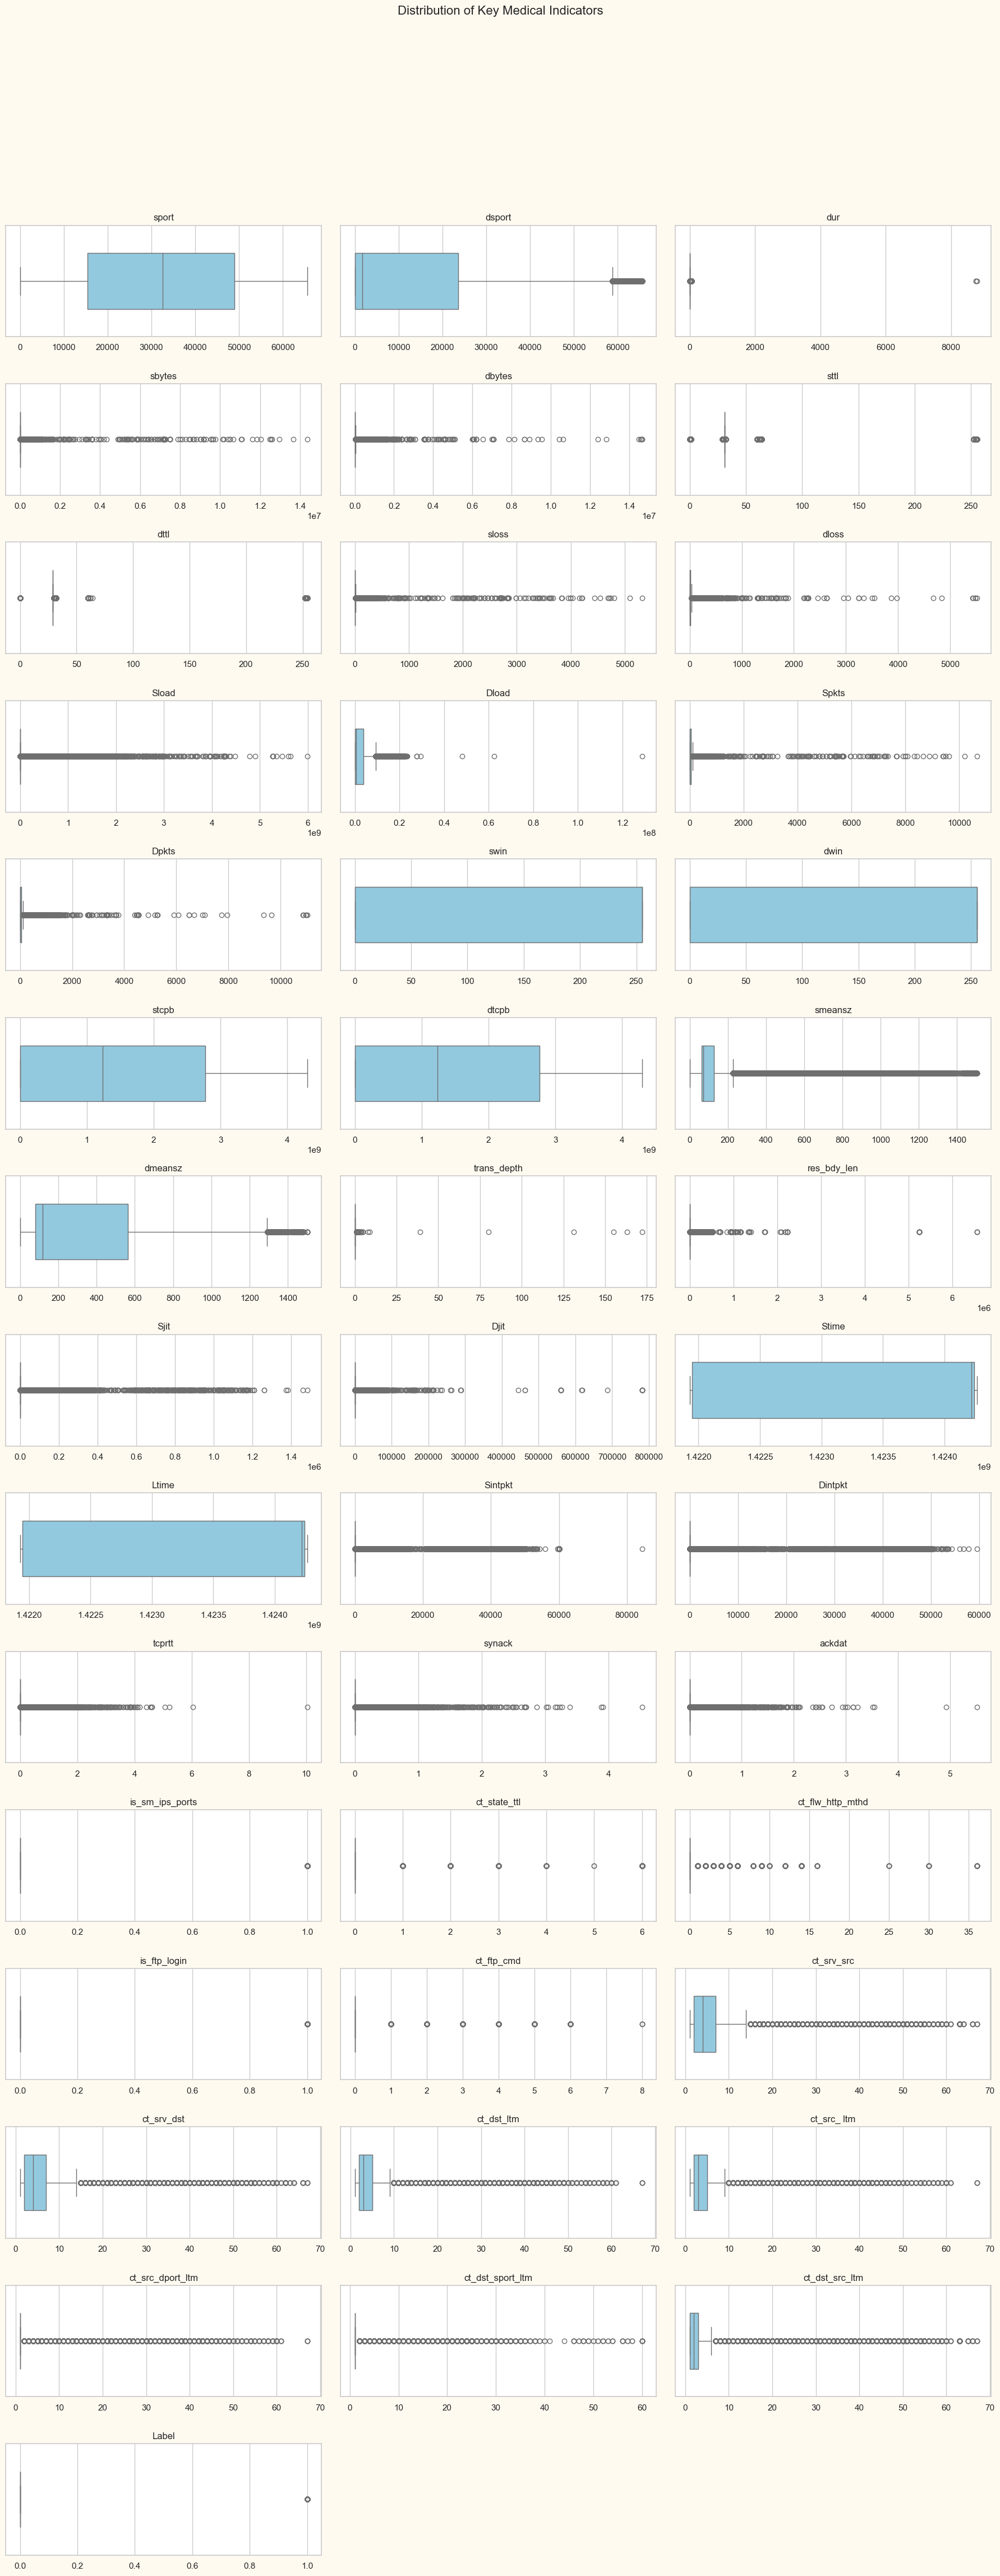

In [31]:
import math

# Number of numerical columns
num_columns = len(numerical_columns)

# Calculate the number of rows and columns needed for the subplots
num_cols = 3  # Fixed number of columns
num_rows = math.ceil(num_columns / num_cols)  # Calculate rows needed

plt.figure(figsize=(18, num_rows * 3))

sns.set_palette("husl")
sns.set(style="whitegrid")

for i, col in enumerate(numerical_columns, 1):
    plt.subplot(num_rows, num_cols, i)
    sns.boxplot(x=train_df[col], color='skyblue', width=0.5)    
    plt.title(col)
    plt.xlabel("")

plt.suptitle("Distribution of Key Medical Indicators", y=1.02, fontsize=16)
plt.tight_layout(rect=[0, 0, 1, 0.95])
plt.show()

In [32]:
# Extract numerical columns
numerical_columns = train_df.select_dtypes(include=['float64', 'int64','int32']).columns.tolist()

# Columns to exclude
exclude_columns = ['sport', 'swim', 'dwim', 'stcpb', 'dtcpb', 'Stime', 'Ltime']

# Filter out the columns to exclude
numerical_columns = [col for col in numerical_columns if col not in exclude_columns]

In [33]:
for col in numerical_columns:
    median_value = train_df[col].median()
    lower_bound = train_df[col].quantile(0.25) - 1.5 * (train_df[col].quantile(0.75) - train_df[col].quantile(0.25))
    upper_bound = train_df[col].quantile(0.75) + 1.5 * (train_df[col].quantile(0.75) - train_df[col].quantile(0.25))
    train_df[col] = train_df[col].apply(lambda x: median_value if x < lower_bound or x > upper_bound else x)

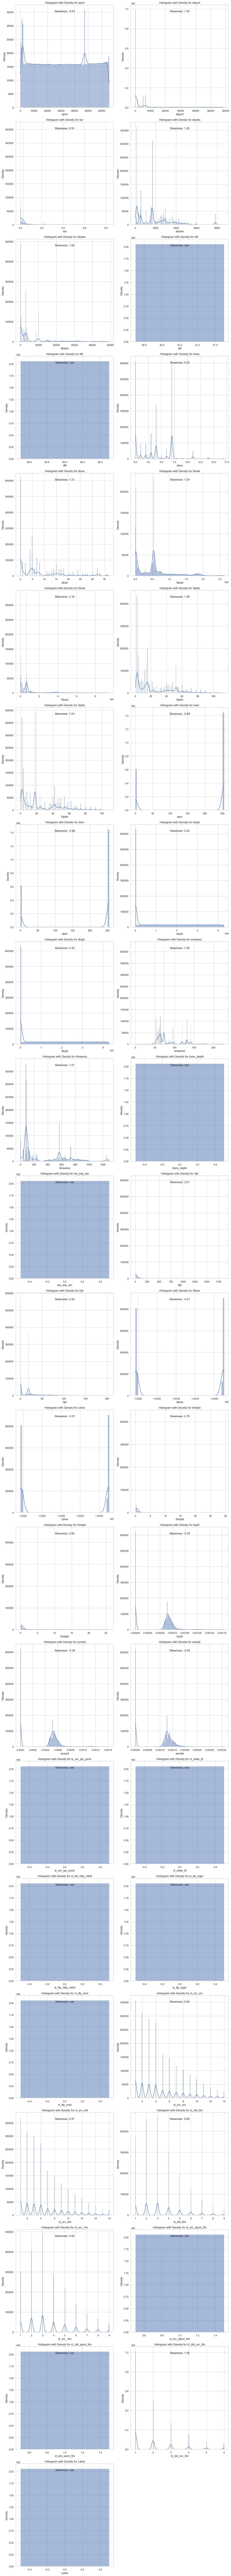

In [34]:
# Set the figure size and arrange plots horizontally in pairs
numerical_features = train_df.select_dtypes(include=['number']).columns
num_plots = len(numerical_features)
num_rows = (num_plots + 1) // 2  # Ensure enough rows to accommodate all features
fig, axes = plt.subplots(nrows=num_rows, ncols=2, figsize=(14, 7*num_rows))

# Flatten the axes array for easy indexing
axes = axes.flatten()

# Loop through the selected columns and create histograms with density
for i, col in enumerate(numerical_features):
    sns.histplot(data=train_df, x=col, kde=True, ax=axes[i])
    axes[i].set_title(f'Histogram with Density for {col}')
    axes[i].set_xlabel(col)
    axes[i].set_ylabel('Density')
    
    # Calculate skewness
    skewness = skew(train_df[col].dropna())
    axes[i].text(0.5, 0.95, f'Skewness: {skewness:.2f}', horizontalalignment='center', verticalalignment='top', transform=axes[i].transAxes)

# Remove any empty subplots if the number of features is odd
if num_plots % 2 != 0:
    fig.delaxes(axes[-1])

plt.tight_layout()
plt.show()

In [35]:
def transform(X):
    eps = 1e-5
    numerical_columns = X.select_dtypes(include=['float64', 'int64', 'int32']).columns.tolist()
    
    for col in numerical_columns:
        skewness = skew(X[col])
        if skewness > 0:  # Positive skew
            X[col] = np.log(X[col] + eps)
        elif skewness < 0:  # Negative skew
            X[col] = np.log(np.max(X[col] + eps) - X[col] + eps)
        else:  # Symmetric or zero skew
            X[col] = X[col]  # No transformation needed


    return X

In [36]:
transform(train_df)

Name,srcip,sport,dstip,dsport,proto,state,dur,sbytes,dbytes,sttl,dttl,sloss,dloss,service,Sload,Dload,Spkts,Dpkts,swin,dwin,stcpb,dtcpb,smeansz,dmeansz,trans_depth,res_bdy_len,Sjit,Djit,Stime,Ltime,Sintpkt,Dintpkt,tcprtt,synack,ackdat,is_sm_ips_ports,ct_state_ttl,ct_flw_http_mthd,is_ftp_login,ct_ftp_cmd,ct_srv_src,ct_srv_dst,ct_dst_ltm,ct_src_ ltm,ct_src_dport_ltm,ct_dst_sport_ltm,ct_dst_src_ltm,attack_cat,Label
0,175.45.176.3,8.969923,149.171.126.15,8.089482,tcp,CON,-1.253983,6.893656,4.454347,31.0,29.0,0.693152,0.000010,-,10.045200,7.094659,1.791761,0.693152,-10.819778,-10.819778,20.451371,22.082540,5.099866,3.761200,0.0,0.0,3.447044,-11.512925,10.537389,10.537415,-0.281908,-6.209621,-6.754176,-6.985717,-8.286081,0.0,0.0,0.0,0.0,0.0,2.302586,2.079443,1.386297,1.609440,1.0,1.0,0.693152,normal,0.0
1,59.166.0.8,10.221323,149.171.126.9,8.836519,tcp,FIN,-1.157341,7.339538,7.404888,31.0,29.0,1.386297,1.386297,-,10.511986,10.584758,2.772589,2.890372,-10.819778,-10.819778,20.414795,21.790466,4.564348,4.510860,0.0,0.0,7.233906,3.558383,9.142062,9.142169,3.040948,2.915594,-6.712188,-6.966444,-8.191493,0.0,0.0,0.0,0.0,0.0,2.639058,1.791761,2.079443,1.098616,1.0,1.0,1.791761,normal,0.0
2,59.166.0.0,10.026767,149.171.126.2,10.559919,udp,CON,-1.200014,6.284134,5.717028,31.0,29.0,-11.512925,-11.512925,-,9.275941,8.708834,1.386297,1.386297,5.541264,5.541264,-11.512925,-11.512925,4.897840,4.330733,0.0,0.0,4.761557,4.816594,14.660415,14.660415,-0.281908,-0.353625,-6.313324,-6.545198,-7.877974,0.0,0.0,0.0,0.0,0.0,2.197226,1.386297,1.945912,1.791761,1.0,1.0,1.098616,normal,0.0
3,175.45.176.1,9.803446,149.171.126.14,3.970292,udp,INT,-10.871072,4.736199,-11.512925,31.0,29.0,-11.512925,-11.512925,dns,13.200695,-11.512925,0.693152,-11.512925,5.541264,5.541264,-11.512925,-11.512925,4.043051,-11.512925,0.0,0.0,-11.512925,-11.512925,9.157572,9.157678,-4.709420,-11.512925,-6.313324,-6.545198,-7.877974,0.0,0.0,0.0,0.0,0.0,1.386297,1.386297,1.098616,1.098616,1.0,1.0,0.693152,generic,0.0
4,59.166.0.5,8.291797,149.171.126.6,3.970292,udp,CON,-6.822495,4.983607,5.181784,31.0,29.0,-11.512925,-11.512925,dns,13.201622,13.399799,0.693152,0.693152,5.541264,5.541264,-11.512925,-11.512925,4.290460,4.488636,0.0,0.0,-11.512925,-11.512925,9.810934,9.810988,-4.709420,-4.960418,-6.313324,-6.545198,-7.877974,0.0,0.0,0.0,0.0,0.0,0.693152,0.693152,1.609440,1.386297,1.0,1.0,0.000010,normal,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2540035,59.166.0.2,10.498057,149.171.126.9,4.962845,tcp,FIN,-3.445776,8.964440,9.619798,31.0,29.0,1.386297,3.465736,-,14.481754,15.137396,2.772589,2.890372,-10.819778,-10.819778,21.073782,21.994746,4.158883,4.787492,0.0,0.0,2.836722,2.681382,10.196120,10.196157,-1.249347,-1.383187,-6.767993,-6.995494,-8.343240,0.0,0.0,0.0,0.0,0.0,1.609440,1.791761,0.000010,1.386297,1.0,1.0,0.000010,normal,0.0
2540037,59.166.0.0,10.761238,149.171.126.0,9.764570,udp,CON,-3.347932,6.269096,5.717028,31.0,29.0,-11.512925,-11.512925,-,11.409072,10.857003,1.386297,1.386297,5.541264,5.541264,-11.512925,-11.512925,4.882802,4.330733,0.0,0.0,2.241743,2.386864,14.650474,14.650475,1.896521,2.041135,-6.313324,-6.545198,-7.877974,0.0,0.0,0.0,0.0,0.0,2.397896,1.386297,1.098616,1.945912,1.0,1.0,0.000010,normal,0.0
2540038,59.166.0.8,10.345606,149.171.126.0,8.554489,tcp,FIN,-4.812317,7.560080,8.369157,31.0,29.0,1.791761,1.791761,-,14.406699,15.219749,3.091043,3.178054,-10.819778,-10.819778,21.463961,22.169542,4.465908,5.192957,0.0,0.0,3.189036,3.047043,14.661593,14.661593,-0.994355,-1.112592,-6.783769,-7.025413,-8.306122,0.0,0.0,0.0,0.0,0.0,1.098616,2.302586,1.386297,0.000010,1.0,1.0,0.000010,normal,0.0
2540039,59.166.0.8,9.125109,149.171.126.2,3.970292,udp,CON,-6.852321,4.867535,5.087596,31.0,29.0,-11.512925,-11.512925,dns,13.115655,13.335717,0.693152,0.693152,5.541264,5.541264,-11.512925,-11.512925,4.174387,4.394449,0.0,

In [37]:
def pie_bar_plot(df, col):
  plt.figure(figsize=(10, 6))
  
  # Extract value counts for the specified column
  value_counts = df[col].value_counts().sort_index()

  ax1 = value_counts
  plt.title(f"Distribution by {col}", fontweight="black", size=14, pad=15)
  colors = sns.color_palette('Set2', len(ax1))
  plt.pie(ax1.values, labels=None, autopct="", startangle=90, colors=colors)
  center_circle = plt.Circle((0, 0), 0.4, fc='white')
  fig = plt.gcf()
  fig.gca().add_artist(center_circle)
  plt.show()

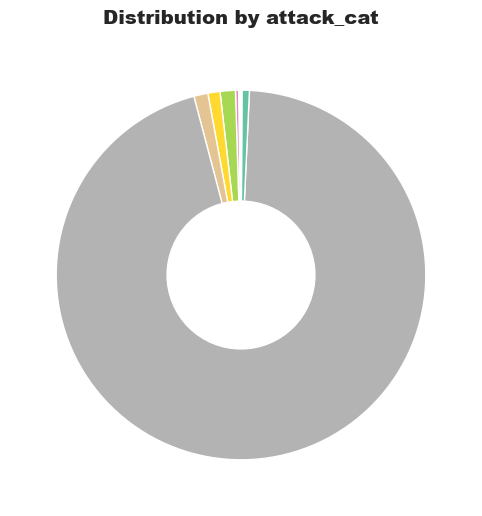

In [38]:
pie_bar_plot(train_df, 'attack_cat')

<a id='3.3'></a>
## **3. Visualising Class Distribution**

In [39]:
# Print class distribution before resampling
print("Before resampling:", train_df['attack_cat'].value_counts())
print()

Before resampling: attack_cat
normal            1959770
exploits            27599
generic             25378
fuzzers             21795
reconnaissance      13357
dos                  5665
analysis             2184
backdoor             1684
shellcode            1511
backdoors             299
worms                 171
Name: count, dtype: int64



<a id='4.1'></a>
## **1. Featutre Engineering**

In [40]:
def generate_features(df):
  # Duration
  df['duration'] = df['Ltime'] - df['Stime']
  
  # Ratios
  df['byte_ratio'] = df['sbytes'] / (df['dbytes'] + 1)
  df['pkt_ratio'] = df['Spkts'] / (df['Dpkts'] + 1)
  df['load_ratio'] = df['Sload'] / (df['Dload'] + 1)
  df['jit_ratio'] = df['Sjit'] / (df['Djit'] + 1)
  df['inter_pkt_ratio'] = df['Sintpkt'] / (df['Dintpkt'] + 1)
  df['tcp_setup_ratio'] = df['tcprtt'] / (df['synack'] + df['ackdat'] + 1)
  
  # Aggregate Features
  df['total_bytes'] = df['sbytes'] + df['dbytes']
  df['total_pkts'] = df['Spkts'] + df['Dpkts']
  df['total_load'] = df['Sload'] + df['Dload']
  df['total_jitter'] = df['Sjit'] + df['Djit']
  df['total_inter_pkt'] = df['Sintpkt'] + df['Dintpkt']
  df['total_tcp_setup'] = df['tcprtt'] + df['synack'] + df['ackdat']
  
  # Interaction Features
  df['byte_pkt_interaction_src'] = df['sbytes'] * df['Spkts']
  df['byte_pkt_interaction_dst'] = df['dbytes'] * df['Dpkts']
  df['load_jit_interaction_src'] = df['Sload'] * df['Sjit']
  df['load_jit_interaction_dst'] = df['Dload'] * df['Djit']
  df['pkt_jit_interaction_src'] = df['Spkts'] * df['Sjit']
  df['pkt_jit_interaction_dst'] = df['Dpkts'] * df['Djit']
  
  # Statistical Features
  df['mean_pkt_size'] = df['smeansz'] + df['dmeansz']
  df['tcp_seq_diff'] = df['stcpb'] - df['dtcpb']
  
  return df

In [41]:
train_df = generate_features(train_df)
train_df

Name,srcip,sport,dstip,dsport,proto,state,dur,sbytes,dbytes,sttl,dttl,sloss,dloss,service,Sload,Dload,Spkts,Dpkts,swin,dwin,stcpb,dtcpb,smeansz,dmeansz,trans_depth,res_bdy_len,Sjit,Djit,Stime,Ltime,Sintpkt,Dintpkt,tcprtt,synack,ackdat,is_sm_ips_ports,ct_state_ttl,ct_flw_http_mthd,is_ftp_login,ct_ftp_cmd,ct_srv_src,ct_srv_dst,ct_dst_ltm,ct_src_ ltm,ct_src_dport_ltm,ct_dst_sport_ltm,ct_dst_src_ltm,attack_cat,Label,duration,byte_ratio,pkt_ratio,load_ratio,jit_ratio,inter_pkt_ratio,tcp_setup_ratio,total_bytes,total_pkts,total_load,total_jitter,total_inter_pkt,total_tcp_setup,byte_pkt_interaction_src,byte_pkt_interaction_dst,load_jit_interaction_src,load_jit_interaction_dst,pkt_jit_interaction_src,pkt_jit_interaction_dst,mean_pkt_size,tcp_seq_diff
0,175.45.176.3,8.969923,149.171.126.15,8.089482,tcp,CON,-1.253983,6.893656,4.454347,31.0,29.0,0.693152,0.000010,-,10.045200,7.094659,1.791761,0.693152,-10.819778,-10.819778,20.451371,22.082540,5.099866,3.761200,0.0,0.0,3.447044,-11.512925,10.537389,10.537415,-0.281908,-6.209621,-6.754176,-6.985717,-8.286081,0.0,0.0,0.0,0.0,0.0,2.302586,2.079443,1.386297,1.609440,1.0,1.0,0.693152,normal,0.0,2.652555e-05,1.263883,1.058240,1.240966,-0.327886,0.054113,0.473253,11.348004,2.484913,17.139859,-8.065882,-6.491529,-22.025974,12.351786,3.087541,34.626244,-81.680285,6.176279,-7.980209,8.861067,-1.631169
1,59.166.0.8,10.221323,149.171.126.9,8.836519,tcp,FIN,-1.157341,7.339538,7.404888,31.0,29.0,1.386297,1.386297,-,10.511986,10.584758,2.772589,2.890372,-10.819778,-10.819778,20.414795,21.790466,4.564348,4.510860,0.0,0.0,7.233906,3.558383,9.142062,9.142169,3.040948,2.915594,-6.712188,-6.966444,-8.191493,0.0,0.0,0.0,0.0,0.0,2.639058,1.791761,2.079443,1.098616,1.0,1.0,1.791761,normal,0.0,1.070606e-04,0.873246,0.712680,0.907398,1.586945,0.776625,0.474094,14.744425,5.662962,21.096744,10.792289,5.956542,-21.870126,20.349524,21.402882,76.042718,37.664625,20.056650,10.285052,9.075208,-1.375671
2,59.166.0.0,10.026767,149.171.126.2,10.559919,udp,CON,-1.200014,6.284134,5.717028,31.0,29.0,-11.512925,-11.512925,-,9.275941,8.708834,1.386297,1.386297,5.541264,5.541264,-11.512925,-11.512925,4.897840,4.330733,0.0,0.0,4.761557,4.816594,14.660415,14.660415,-0.281908,-0.353625,-6.313324,-6.545198,-7.877974,0.0,0.0,0.0,0.0,0.0,2.197226,1.386297,1.945912,1.791761,1.0,1.0,1.098616,normal,0.0,0.000000e+00,0.935553,0.580941,0.955412,0.818616,-0.436137,0.470330,12.001162,2.772594,17.984775,9.578151,-0.635533,-20.736496,8.711675,7.925498,44.167925,41.946919,6.600932,6.677229,9.228573,0.000000
3,175.45.176.1,9.803446,149.171.126.14,3.970292,udp,INT,-10.871072,4.736199,-11.512925,31.0,29.0,-11.512925,-11.512925,dns,13.200695,-11.512925,0.693152,-11.512925,5.541264,5.541264,-11.512925,-11.512925,4.043051,-11.512925,0.0,0.0,-11.512925,-11.512925,9.157572,9.157678,-4.709420,-11.512925,-6.313324,-6.545198,-7.877974,0.0,0.0,0.0,0.0,0.0,1.386297,1.386297,1.098616,1.098616,1.0,1.0,0.693152,generic,0.0,1.054130e-04,-0.450512,-0.065933,-1.255663,1.095121,0.447965,0.470330,-6.776727,-10.819773,1.687770,-23.025851,-16.222346,-20.736496,3.282906,132.547453,-151.978620,132.547453,-7.980209,132.547453,-7.469874,0.000000
4,59.166.0.5,8.291797,149.171.126.6,3.970292,udp,CON,-6.822495,4.983607,5.181784,31.0,29.0,-11.512925,-11.512925,dns,13.201622,13.399799,0.693152,0.693152,5.541264,5.541264,-11.512925,-11.512925,4.290460,4.488636,0.0,0.0,-11.512925,-11.512925,9.810934,9.810988,-4.709420,-4.960418,-6.313324,-6.545198,-7.877974,0.0,0.0,0.0,0.0,0.0,0.693152,0.693152,1.609440,1.386297,1.0,1.0,0.000010,normal,0.0,5.484711e-05,0.806176,0.409386,0.916792,1.095121,1.189122,0.470330,10.165390,1.386304,26.601420,-23.025851,-9.669838,-20.736496,3.454398,3.591765,-151.989286,-154.270881,-7.980209,-7.980209,8.779096,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,..

In [42]:
# Drop the specified columns from both train_df and test_df
columns_to_drop = ['sport', 'dsport', 'proto','srcip', 'dstip','state', 'service']
train_df.drop(columns=columns_to_drop, inplace=True)

In [43]:
#Checking the categorical columns 
cat_columns = train_df.select_dtypes(include=['O']).columns.tolist()
cat_columns

['attack_cat']

<a id='4.2'></a>
## **2. Target feature Encoding**

In [44]:
label_encoder = LabelEncoder()
ohe = OneHotEncoder()

In [45]:
train_df['attack_cat'] = label_encoder.fit_transform(train_df['attack_cat'])

In [46]:
label_mapping = dict(zip(label_encoder.classes_, label_encoder.transform(label_encoder.classes_)))
print("Label Mapping:")
print(label_mapping)

Label Mapping:
{'analysis': 0, 'backdoor': 1, 'backdoors': 2, 'dos': 3, 'exploits': 4, 'fuzzers': 5, 'generic': 6, 'normal': 7, 'reconnaissance': 8, 'shellcode': 9, 'worms': 10}


<a id='4.3'></a>
## **3. checking Highly Correlated Features**

<Axes: title={'center': 'Correlation Plot'}, xlabel='Name', ylabel='Name'>

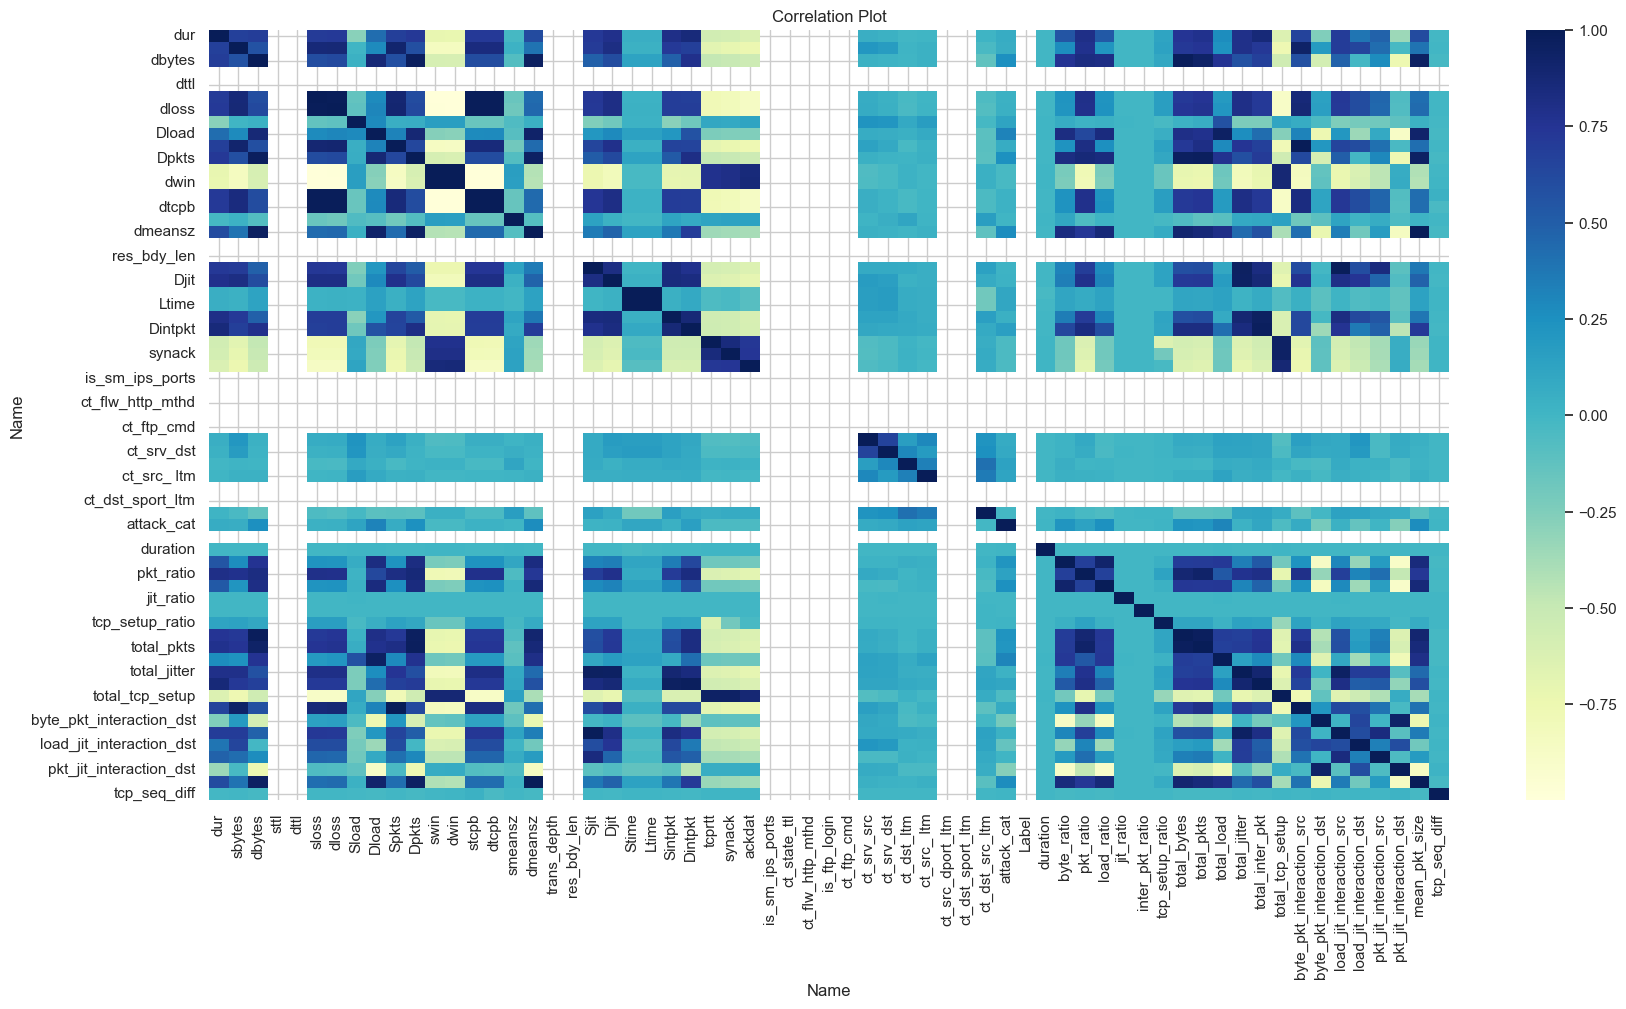

In [47]:
plt.figure(figsize=(20,10))
plt.title("Correlation Plot")
sns.heatmap(train_df.corr(),cmap='YlGnBu')

In [48]:
# Calculate the correlation matrix
correlation_matrix = train_df.corr()

# Create a mask to identify the features with a correlation coefficient greater than or equal to 0.75
high_correlation_mask = correlation_matrix >= 0.75

# Identify and list the highly correlated features
highly_correlated_features = []

for feature in high_correlation_mask.columns:
    correlated_with = high_correlation_mask.index[high_correlation_mask[feature]].tolist()
    for correlated_feature in correlated_with:
        if feature != correlated_feature and (correlated_feature, feature) not in highly_correlated_features:
            highly_correlated_features.append((feature, correlated_feature))

# Print the highly correlated features
print("Highly correlated features:")
for feature1, feature2 in highly_correlated_features:
  print(f"{feature1} and {feature2}")


Highly correlated features:
dur and Djit
dur and Sintpkt
dur and Dintpkt
dur and pkt_ratio
dur and total_pkts
dur and total_jitter
dur and total_inter_pkt
sbytes and sloss
sbytes and dloss
sbytes and Spkts
sbytes and stcpb
sbytes and dtcpb
sbytes and Djit
sbytes and pkt_ratio
sbytes and total_jitter
sbytes and byte_pkt_interaction_src
dbytes and Dload
dbytes and Dpkts
dbytes and dmeansz
dbytes and Dintpkt
dbytes and byte_ratio
dbytes and pkt_ratio
dbytes and load_ratio
dbytes and total_bytes
dbytes and total_pkts
dbytes and total_load
dbytes and mean_pkt_size
sloss and dloss
sloss and Spkts
sloss and stcpb
sloss and dtcpb
sloss and Djit
sloss and pkt_ratio
sloss and total_jitter
sloss and byte_pkt_interaction_src
dloss and Spkts
dloss and stcpb
dloss and dtcpb
dloss and Djit
dloss and pkt_ratio
dloss and total_pkts
dloss and total_jitter
dloss and byte_pkt_interaction_src
Dload and Dpkts
Dload and dmeansz
Dload and byte_ratio
Dload and load_ratio
Dload and total_bytes
Dload and total_p

In [49]:
# Create a set of features to drop
features_to_drop = set()

# Iterate over the highly correlated features and add one of each pair to the drop list
for feature1, feature2 in highly_correlated_features:
    if feature1 not in features_to_drop and feature2 not in features_to_drop:
      features_to_drop.add(feature2)  # You can choose feature1 or feature2 to drop

# Drop the features from the DataFrame
train_df = train_df.drop(columns=features_to_drop)

# Print the remaining features
print("Remaining features after dropping highly correlated ones:")
print(train_df.columns)

Remaining features after dropping highly correlated ones:
Index(['dur', 'sbytes', 'dbytes', 'sttl', 'dttl', 'Sload', 'swin', 'smeansz',
       'trans_depth', 'res_bdy_len', 'Sjit', 'Stime', 'is_sm_ips_ports',
       'ct_state_ttl', 'ct_flw_http_mthd', 'is_ftp_login', 'ct_ftp_cmd',
       'ct_srv_src', 'ct_srv_dst', 'ct_dst_ltm', 'ct_src_ ltm',
       'ct_src_dport_ltm', 'ct_dst_sport_ltm', 'ct_dst_src_ltm', 'attack_cat',
       'Label', 'duration', 'jit_ratio', 'inter_pkt_ratio', 'tcp_setup_ratio',
       'byte_pkt_interaction_dst', 'load_jit_interaction_dst', 'tcp_seq_diff'],
      dtype='object', name='Name')


In [50]:
x = train_df.drop(['attack_cat'], axis=1)
y = train_df[['attack_cat']]

<a id='4.4'></a>
## **4. Splitting the features in dependent and independent features**


In [51]:
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler
from imblearn.pipeline import Pipeline
import pandas as pd

# Define the desired number of samples for each class
desired_count = 15000

# Define the oversampling strategy for SMOTE
oversample_strategy = {i: desired_count for i in range(len(y.value_counts())) if y.value_counts()[i] < desired_count}

# Define the undersampling strategy for RandomUnderSampler
undersample_strategy = {i: desired_count for i in range(len(y.value_counts())) if y.value_counts()[i] > desired_count}

# Create the SMOTE and RandomUnderSampler objects
smote = SMOTE(sampling_strategy=oversample_strategy)
undersample = RandomUnderSampler(sampling_strategy=undersample_strategy)

# Combine SMOTE and RandomUnderSampler in a pipeline
pipeline = Pipeline(steps=[('smote', smote), ('undersample', undersample)])

# Print class distribution before resampling
print("Before resampling:", y.value_counts())
print()

# Apply the pipeline to resample the dataset
x_resampled, y_resampled = pipeline.fit_resample(x, y)

# Print class distribution after resampling
print("After resampling:", y_resampled.value_counts())

Before resampling: attack_cat
7             1959770
4               27599
6               25378
5               21795
8               13357
3                5665
0                2184
1                1684
9                1511
2                 299
10                171
Name: count, dtype: int64

After resampling: attack_cat
0             15000
1             15000
2             15000
3             15000
4             15000
5             15000
6             15000
7             15000
8             15000
9             15000
10            15000
Name: count, dtype: int64


In [52]:
x = x_resampled
y = y_resampled

<a id='4.6'></a>
## **6. Checking Feature Importance**


In [54]:
from sklearn.feature_selection import mutual_info_classif
discrete_features = x.dtypes == int

def mi_score_maker(x,y,discrete_features):
    scores = mutual_info_classif(x,y,discrete_features=discrete_features)
    df = pd.DataFrame({
        'Features':x.columns,
        'Scores':scores
    })
    df = df.sort_values(['Scores'],ascending=False).reset_index(drop=True)
    return df

In [55]:
mi_scores = mi_score_maker(x,y.astype('float64'),discrete_features)
mi_scores

,Features,Scores
0,sbytes,1.311079
1,smeansz,1.066893
2,byte_pkt_interaction_dst,0.759815
3,dbytes,0.740541
4,duration,0.671067
5,Stime,0.602021
6,inter_pkt_ratio,0.562236
7,dur,0.518342
8,ct_srv_dst,0.476784
9,load_jit_interaction_dst,0.475795


In [56]:
# Filter features with scores less than 0.001285
low_score_features = mi_scores[mi_scores['Scores'] < 0.01]

# Extract the feature names
low_score_feature_names = low_score_features['Features'].tolist()

# Print the list of low score feature names
low_score_feature_names

['ct_dst_sport_ltm',
 'ct_src_dport_ltm',
 'sttl',
 'trans_depth',
 'ct_ftp_cmd',
 'is_ftp_login',
 'ct_flw_http_mthd',
 'ct_state_ttl',
 'Label',
 'is_sm_ips_ports',
 'res_bdy_len',
 'dttl']

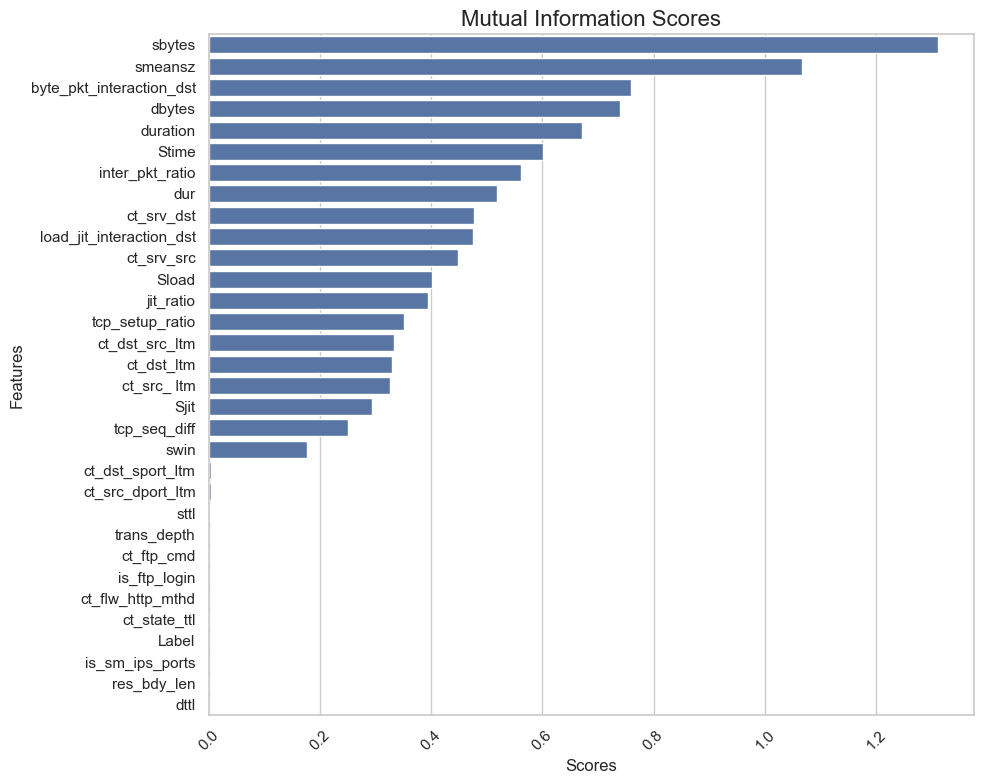

In [57]:
plt.figure(figsize=(10, 8))

# Create the barplot
sns.barplot(x='Scores', y='Features', data=mi_scores)

# Add a title
plt.title("Mutual Information Scores", fontsize=16)

# Rotate the y-axis labels (if needed)
plt.yticks(rotation=0)

# Rotate the x-axis labels (if needed)
plt.xticks(rotation=45)

# Display the plot
plt.tight_layout()  # Adjusts the plot to ensure everything fits without overlap
plt.show()

In [58]:
x.drop(low_score_feature_names,axis=1, inplace = True)

<a id='4.7'></a>
## **7. Dividing in train-test-split -> Feature Scaling**


In [59]:
# Split before scaling
x_train, x_test, y_train, y_test = train_test_split(
    x, y, test_size=0.2, random_state=42, stratify=y
)

# Scale after splitting
scaler = StandardScaler()
x_train_scaled = scaler.fit_transform(x_train)   # fit only on train
x_test_scaled = scaler.transform(x_test)     

In [60]:
x_train_scaled.shape

(132000, 20)

In [61]:
# Path to save
DATA_DIR = Path("E:/ZeusOps/data/UNSW-NB15/processed")
DATA_DIR.mkdir(parents=True, exist_ok=True)  # create folder if not exists

# Convert NumPy arrays to DataFrames before saving
pd.DataFrame(x_train_scaled).to_pickle(DATA_DIR / "unsw_x_train_v1.pkl")
pd.DataFrame(x_test_scaled).to_pickle(DATA_DIR / "unsw_x_test_v1.pkl")

# Save y directly (already DataFrame)
y_train.to_pickle(DATA_DIR / "unsw_y_train_v1.pkl")
y_test.to_pickle(DATA_DIR / "unsw_y_test_v1.pkl")

print("✅ Train/Test datasets saved successfully!")


✅ Train/Test datasets saved successfully!
